This was a problem in my Computer Vision final exam. We were supposed to find out how many dots pacman had left in a current game state to win.

In [28]:
from skimage import data
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

In [29]:
from skimage.filters import threshold_otsu, threshold_local, threshold_niblack, threshold_sauvola

from skimage.morphology import label
from skimage.measure import regionprops

In [30]:
from skimage.morphology import erosion, dilation, opening, closing

from skimage.morphology import disk, diamond, square, rectangle

In [31]:
# function to display de image
def imshow(img):
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.imshow(img,cmap=plt.cm.gray)
    ax.set_xticks([]), ax.set_yticks([])
    plt.show()

In [32]:
pacman = data.imread('img/pacman1.jpg')

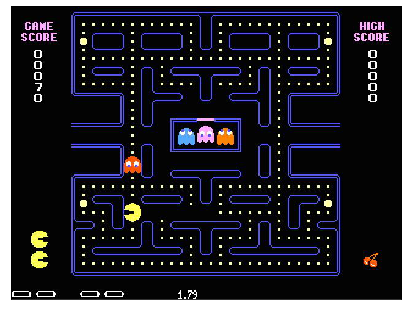

In [33]:
imshow(pacman)

In [34]:
# Convert the image to grayscale
im_pacman = rgb2gray(pacman)

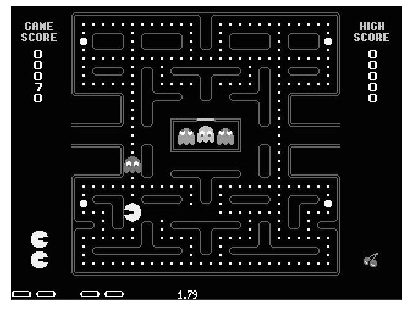

In [35]:
imshow(im_pacman)

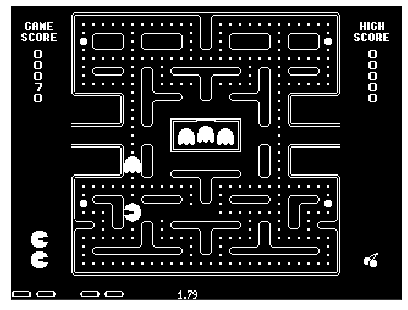

In [36]:
# Umbralization
thresh = threshold_otsu(im_pacman)
binary_otsu = im_pacman > thresh
imshow(binary_otsu)

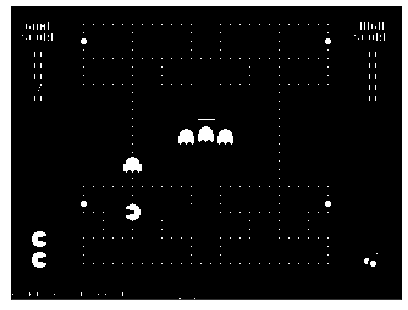

308


In [37]:
# mathematic morphology, using a square opperator to get rid of the walls
image_tras_opening = erosion(binary_otsu, square(3))
imshow(image_tras_opening)
print(len(regionprops(label(image_tras_opening, connectivity=1))))

Utilizando un elemento estructural cuadrado, podemos eliminar las paredes del laberinto. Esto me sirve para eliminar los elementos no circulares de la imagen

In [40]:
# Using regionprops to see the area of the different sections of the image
res = regionprops(label(image_tras_opening, connectivity=1))
for i in res:
    print(i.area)
print(len(res))

24
24
24
24
24
24
16
20
20
56
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
16
8
8
4
4
4
4
4
4
24
24
24
24
4
16
16
16
8
4
16
16
16
8
4
84
84
4
4
4
4
4
4
4
4
4
4
4
4
4
16
16
16
16
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
16
16
16
16
4
4
4
4
4
4
16
16
16
16
4
4
4
4
4
4
8
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
16
16
4
4
4
4
16
16
16
16
4
4
4
4
4
4
56
4
516
4
516
516
4
4
4
4
4
4
564
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
84
84
428
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
420
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
420
4
4
4
4
4
60
84
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
8
8
8
8
8
8
8
8
2
3
4
2
308


Como la mayoria de los elementos de la imagen tiene area=4, voy a asumir que estos son los puntos. Por lo tanto, paso a eliminar los demas elementos de la lista y a contar el numero de puntos que hay

In [39]:
# Since most of the sections have an area of 4, I'm assuming those are the dots pacman has left to eat
# Now I just have to count them to get the answer
for i in res:
    if i.area != 4:
        res.remove(i)
print(len(res))

269


El resultado final es que a pac man le quedan 269 puntos por comer para terminar la partida